In [2]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
purchase_behaviour = pd.read_csv('QVI_purchase_behaviour.csv')
pb_df = purchase_behaviour.copy()
pb_df.dropna(inplace=True)
transaction_data = pd.read_excel('QVI_transaction_data.xlsx')
td_df = transaction_data.copy()
td_df.dropna(inplace=True)
df = pd.merge(td_df, pb_df, on=['LYLTY_CARD_NBR'])
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,43533,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [40]:
pb_df.shape

(72637, 3)

In [3]:
df['PACK_SIZE'] = df['PROD_NAME'].str.extract('(\d+)')

In [5]:
df_1 = df.copy()

In [8]:
#removing special characters
import re
df_1['PROD_NAME'] = df_1['PROD_NAME'].map(lambda x: re.sub(r'\W+', '', x))

In [9]:
#removing the numerical part of the sting
import string
df_1['PROD_NAME'] = df_1['PROD_NAME'].str.replace('\d+', "")
df_1['PROD_NAME'] = df_1['PROD_NAME'].apply(lambda x: x[:-1].strip())
df_1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE
0,43390,1,1000,1,5,NaturalChipCompnySeaSalt,2,6.0,YOUNG SINGLES/COUPLES,Premium,175
1,43599,1,1307,348,66,CCsNachoCheese,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175
2,43414,1,1307,346,96,WWOriginalStackedChips,2,3.8,MIDAGE SINGLES/COUPLES,Budget,160
3,43533,1,1307,347,54,CCsOriginal,1,2.1,MIDAGE SINGLES/COUPLES,Budget,175
4,43605,1,1343,383,61,SmithsCrinkleCutChipsChicken,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170
...,...,...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,KettleSweetChilliAndSourCream,2,10.8,YOUNG SINGLES/COUPLES,Premium,175
264832,43325,272,272358,270154,74,TostitosSplashOfLime,1,4.4,YOUNG SINGLES/COUPLES,Premium,175
264833,43410,272,272379,270187,51,DoritosMexicana,2,8.8,YOUNG SINGLES/COUPLES,Premium,170
264834,43461,272,272379,270188,42,DoritosCornChipMexicanJalapeno,2,7.8,YOUNG SINGLES/COUPLES,Premium,150


In [10]:
df_1 = df_1[~df_1["PROD_NAME"].str.contains("Salsa")]
df_1 = df_1[~df_1["PROD_NAME"].str.contains("SALSA")]
df_1 = df_1[~df_1["PROD_NAME"].str.contains("Salsa")]
df_1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE
0,43390,1,1000,1,5,NaturalChipCompnySeaSalt,2,6.0,YOUNG SINGLES/COUPLES,Premium,175
1,43599,1,1307,348,66,CCsNachoCheese,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175
2,43414,1,1307,346,96,WWOriginalStackedChips,2,3.8,MIDAGE SINGLES/COUPLES,Budget,160
3,43533,1,1307,347,54,CCsOriginal,1,2.1,MIDAGE SINGLES/COUPLES,Budget,175
4,43605,1,1343,383,61,SmithsCrinkleCutChipsChicken,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170
...,...,...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,KettleSweetChilliAndSourCream,2,10.8,YOUNG SINGLES/COUPLES,Premium,175
264832,43325,272,272358,270154,74,TostitosSplashOfLime,1,4.4,YOUNG SINGLES/COUPLES,Premium,175
264833,43410,272,272379,270187,51,DoritosMexicana,2,8.8,YOUNG SINGLES/COUPLES,Premium,170
264834,43461,272,272379,270188,42,DoritosCornChipMexicanJalapeno,2,7.8,YOUNG SINGLES/COUPLES,Premium,150


In [12]:
df_1['PROD_NAME'].value_counts()

KettleMozzarellaBasilPesto         3304
KettleTortillaChpsHnyJlpnoChili    3296
CobsPopdSwtChlliSrCreamChips       3269
TyrrellsCrispsChedChives           3268
CobsPopdSeaSaltChips               3265
                                   ... 
SunbitesWhlegrnCrispsFrchOnin      1432
RRDPcSeaSalt                       1431
NCCSourCreamGardenChives           1419
FrenchFriesPotatoChips             1418
WWCrinkleCutOriginal               1410
Name: PROD_NAME, Length: 105, dtype: int64

In [13]:
df_1.dropna(inplace=True)

In [14]:
df_1[df_1["PROD_QTY"] >= 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE
71456,43331,226,226000,226201,4,DoritoCornChpSupreme,200,650.0,OLDER FAMILIES,Premium,380
71457,43605,226,226000,226210,4,DoritoCornChpSupreme,200,650.0,OLDER FAMILIES,Premium,380


In [15]:
df_1[df_1['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE
71456,43331,226,226000,226201,4,DoritoCornChpSupreme,200,650.0,OLDER FAMILIES,Premium,380
71457,43605,226,226000,226210,4,DoritoCornChpSupreme,200,650.0,OLDER FAMILIES,Premium,380


In [17]:
#converting 5 digit numbers to date
#these 5 digits number are days and csv date starts from 30-12-1899. Now when we convert this date to a 5 digit number we get 25569. we use this number as origin
df_1['DATE'] = pd.to_datetime((df_1['DATE'] - 25569) * 86400.0, unit='s')

In [18]:
df['DATE'].value_counts()

2018-12-24    939
2018-12-23    917
2018-12-22    915
2018-12-19    906
2018-12-18    862
             ... 
2018-12-12    664
2019-06-24    662
2019-06-13    659
2018-10-18    658
2018-11-25    648
Name: DATE, Length: 364, dtype: int64

In [207]:
x = df.copy()

In [208]:
# for creating a graphs month wise we need to create a colum month where we month of the values are stored and then we
#use the below mothod
x['Month'] = x['DATE'].dt.to_period('m')

In [209]:
x['Month'].value_counts().sort_index()

2018-07    21016
2018-08    20865
2018-09    20296
2018-10    20772
2018-11    20353
2018-12    21225
2019-01    20610
2019-02    19005
2019-03    21124
2019-04    20281
2019-05    20833
2019-06    20362
Freq: M, Name: Month, dtype: int64

In [20]:
convert_dict = {'PACK_SIZE': int}
df_1 = df_1.astype(convert_dict)

In [21]:
df_1['PACK_SIZE'].value_counts()

175    66390
150    40203
134    25102
110    22387
170    19983
165    15297
330    12540
380     6418
270     6285
210     6272
200     4473
135     3257
250     3169
90      3008
190     2995
160     2970
220     1564
70      1507
180     1468
125     1454
Name: PACK_SIZE, dtype: int64

In [23]:
max(df_1['PACK_SIZE'])

380

In [24]:
min(df_1['PACK_SIZE'])

70

In [25]:
import matplotlib.pyplot as plt

20 20


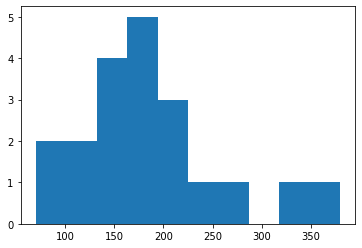

In [26]:
y = df_1['PACK_SIZE'].value_counts()
idx = y.index
vals = y.values
print(len(idx), len(vals))
plt.hist(idx)
plt.show()

In [30]:
df_2 = df.copy()

In [36]:
# df_2['BRAND_NAME'] = df_2['PROD_NAME'].str.split(expand=True)
df_2['BRAND_NAME'] = df_2['PROD_NAME'].str.split(expand=True)[0]

In [38]:
df_2['BRAND_NAME'].replace("RED", "RRD", inplace=True)

In [41]:
df_2.groupby('LIFESTAGE')['TOT_SALES'].sum().sort_values(ascending=False)

LIFESTAGE
OLDER SINGLES/COUPLES     402426.75
RETIREES                  366470.90
OLDER FAMILIES            353767.20
YOUNG FAMILIES            316160.10
YOUNG SINGLES/COUPLES     260405.30
MIDAGE SINGLES/COUPLES    184751.30
NEW FAMILIES               50433.45
Name: TOT_SALES, dtype: float64

In [43]:
df_2.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['TOT_SALES'].sum().sort_values(ascending=False)

PREMIUM_CUSTOMER  LIFESTAGE             
Budget            OLDER FAMILIES            168363.25
Mainstream        YOUNG SINGLES/COUPLES     157621.60
                  RETIREES                  155677.05
Budget            YOUNG FAMILIES            139345.85
                  OLDER SINGLES/COUPLES     136769.80
Mainstream        OLDER SINGLES/COUPLES     133393.80
Premium           OLDER SINGLES/COUPLES     132263.15
Budget            RETIREES                  113147.80
Mainstream        OLDER FAMILIES            103445.55
Premium           RETIREES                   97646.05
Mainstream        YOUNG FAMILIES             92788.75
                  MIDAGE SINGLES/COUPLES     90803.85
Premium           YOUNG FAMILIES             84025.50
                  OLDER FAMILIES             81958.40
Budget            YOUNG SINGLES/COUPLES      61141.60
Premium           MIDAGE SINGLES/COUPLES     58432.65
                  YOUNG SINGLES/COUPLES      41642.10
Budget            MIDAGE SINGLES/COUPLES 